# NewsOptimism

####  *A way to quantify the goodness of the article based on the vocabulary content of the news article*

##### NOTE: This is a sample analysis for single article taken from CNN webpage on Dec 3rd 2017

### Learning Resources:
1. [collocation](https://www.youtube.com/watch?v=Kf25kCKuOUI)
2. [Unicode and WHy?](https://www.youtube.com/watch?v=sqPTR_v4qFA)
3. [concordance](http://www.nltk.org/book/ch01.html)
4. [vader sentiment analysis](http://www.nltk.org/howto/sentiment.html)
5. [ALl about vader](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)

## STEP1: Install requirements

In [1]:
#The following commands import the modules, algorithms, corpora, lists that will be needed for exploratory book analysis
import nltk #imports the nltk module
nltk.download("words") # downloads English words
nltk.download("stopwords") # downloads English stopwords 
from nltk.text import Text #imports the Text module that enables the exploratory search of the text
from nltk import bigrams # imports the bigrams module
from nltk.collocations import * # imports the collocations methods
import string # imports string module that allows running processs on strings
from string import punctuation # imports punctuation symbols
import os #this module allows interfacing with the underlying operating system
import re #imports regular expression module 
from collections import OrderedDict #imports collections module, an alternative to list, dict, set, tuple
from nltk.draw import dispersion_plot
from IPython.display import display # a module that wraps the object to be displayed
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import string

[nltk_data] Downloading package words to /home/harish/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/harish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download("punkt") # downloads punkt tokenizer models
nltk.download('averaged_perceptron_tagger') # downloads the algorithm for predicting the part of speech information
nltk.download('maxent_ne_chunker') # downloads the maximum entropy chunker that has been trained on the ACE 2004 corpus https://catalog.ldc.upenn.edu/LDC2005T09
from nltk import word_tokenize, pos_tag, ne_chunk #imports a word tokenizer, part of speech tagger and named entity tagger

[nltk_data] Downloading package punkt to /home/harish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [3]:
nltk.download('tagsets')
# nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /home/harish/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [4]:
from collections import defaultdict
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [5]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer # imports WordNetLemmatizer
from nltk.corpus import wordnet as wn # imports Wordnet corpus
from nltk.corpus import sentiwordnet as swn # imports SentiWordNet

/usr/local/lib/python3.5/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# STEP 2: Data Preprocessing

### Exploring through Pandas Dataframe

In [7]:
os.chdir('/home/harish/PycharmProjects/NewsOptimism/')
df = pd.read_csv('csvdataset/12032017/cnn.csv')
df = df.dropna(how='any')

In [8]:
df.shape

(973, 6)

In [9]:
maxdf = {}
max_i = 0
for i in range(df.shape[0]):
    maxdf[i] = len(str(df['TEXT'].iloc[i]))
print(sorted(maxdf.items(), key=lambda x:x[1], reverse=True)[:10])

[(576, 69924), (77, 68707), (747, 50964), (230, 38367), (497, 36668), (582, 36488), (630, 34847), (412, 34630), (611, 33119), (759, 32342)]


In [10]:
#WHICH ID are you trying to analyze:
id_num = sorted(maxdf.items(), key=lambda x:x[1], reverse=True)[:1][0][0]
id_num

576

In [11]:
df['TITLE'].iloc[id_num]

'The naked truth'

In [12]:
df['SUMMARY'].iloc[id_num]

'To her 5,000 friends and thousands more followers on Facebook, Paulette was already a hero.\n"I lost my mother to breast cancer but I know if she were alive, she would be walking with you -- the whole way.\nIt was God who woke her up one night in December 2013 to tell her she had breast cancer, which doctors later confirmed.\nShe worried a lump under her arm was the return of breast cancer, and supporters overwhelmed her with more prayers.\nAnnette Johnson, a longtime acquaintance of PauletteAnd then there was this: She told Paulette she was marrying her long-lost love.'

In [13]:
#Testing with single text:
data = str(df['TEXT'][id_num])
data = data.replace("\n","")

In [14]:
words_string = nltk.word_tokenize(data)
words_string#need to remove punctuations# todo
len(words_string)

13989

## Removing stop words:


In [15]:
stopwords = set(nltk.corpus.stopwords.words("english"))

In [16]:
#To remove single character's punctations(char len 2) and stopwords; also lower words:
words_string = [word.lower() for word in words_string if (len(word) > 2 and word.lower() not in stopwords)]
# reduced list:
len(words_string)

6224

In [17]:
#converting back to text
textList = Text(words_string)
textList[:5]

['cnn', 'behind', 'double-mastectomy', 'scars', 'run']

## STEP 3: Text Analysis

### Freq Distribution

In [18]:
fdist = nltk.FreqDist(words_string)
for word, freq in fdist.most_common(5):
    display("%s %d" % (str(word), freq))

'paulette 261'

'said 155'

'cancer 79'

"n't 76"

'told 57'

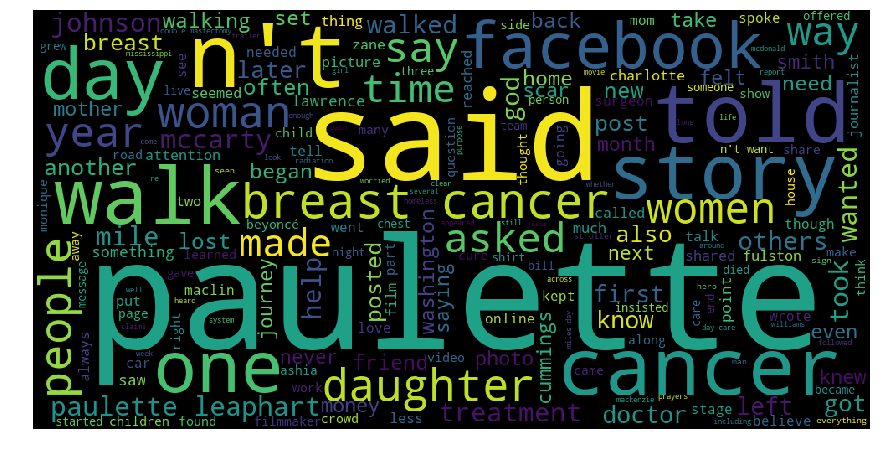

In [19]:
from wordcloud import WordCloud as wc
wordcloud1 = wc(width = 1000, height = 500).generate(' '.join(textList))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

### Finding some context:
where does the *word* occur in the context

In [20]:
textList.concordance('woman')

Displaying 25 of 28 matches:
ed walk away paulette story even one woman life saved thanks conversation paule
t cancer five years october said one woman nine years cancer-free said another 
 one man survived lymphoma himself.a woman driven night took shirt reveal tangl
ry step way love wrote another brave woman year phenomenal woman wrote third lo
 another brave woman year phenomenal woman wrote third lost mother breast cance
tographed.she said people surrounded woman began cry onlookers applauded paulet
internet ever put down.only one said woman n't know spreading lies criminal rec
 know spreading lies criminal record woman suspected crazy jealous woman determ
record woman suspected crazy jealous woman determined ignore.what documentary g
ested god knows could leave homeless woman someone reached wondering could orga
rly mccarty paulette chief adversary woman paulette said spreading lies her.pau
east cancer deeply personal decision woman makes doctor.perhaps paulette radiat
 facebook p

In [21]:
textList.similar('woman')
# textList._word_context_index.similar_words('woman')

story cure


In [22]:
#builds a text index object: based on the textlist
textIndex = nltk.text.ContextIndex(textList)

In [23]:
#how similar is the word 'cancer'
sorted(textIndex.word_similarity_dict('cancer').items(), key=lambda x:x[1], reverse=True)[:5]

[('cancer', 1.0),
 ('implants', 0.02631578947368421),
 ('african-american', 0.02631578947368421),
 ('globe.she', 0),
 ('loves', 0)]

## A lexical dispersion plot:
(These allow us to determine the locations of a word in the text i.e. how many times the word (or multiple words) occurs from the beginning to end of the text.)

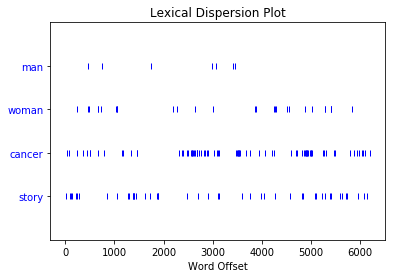

In [24]:
textList.dispersion_plot(['man','woman', 'cancer', "story"])

In [25]:
#Print collocations derived from the text, ignoring stopwords.
textList.collocations()

breast cancer; paulette leaphart; reconstructive surgery; could n't;
new orleans; double mastectomy; care center; seven months; north
carolina; tested positive; n't want; 're going; medical records;
social media; 5,000 month; long-lost love; miles day; day care;
criminal record; hostile unsafe


In [26]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # obtains bigram association measures


finder = BigramCollocationFinder.from_words(words_string, 5) # finds bigrams in the text
finder.apply_freq_filter(5) #removes bigrams that appear less than 5 times
bigrams = finder.nbest(bigram_measures.likelihood_ratio, 10) #obtain the bigrams with the highest likelihood ratio
print('\n'.join('%s %s' % v for v in bigrams)) #printing them out

breast cancer
reconstructive surgery
need need
medical records
could n't
new orleans
need woman
paulette leaphart
care center
're going


## Determining the window size

In [27]:
# If we are interested in examining the surrounding context of a particular word in the text, we need to decide on the parameters of that context.
# If, for example, we are interested in three words that precede a particular word and three words after then we are interested in a 7-word window size.
# This window size can be established as follows:
ngrams = [words_string[i:i+7] for i in range(len(words_string)-6)]# http://digitalhistoryhacks.blogspot.com/2006/08/easy-pieces-in-python-keyword-in.html
    
kwicdict = {}           # opens up a kwicdict        
for n in ngrams: #indexes the fourth word in a sliding window of 7 (three words on each side) 
    if n[3] not in kwicdict: 
        kwicdict[n[3]] = [n]
    else:
        kwicdict[n[3]].append(n)
        
for n in kwicdict['woman']: # nicely formatted output for the word we are interested in determining the context for
    outstring = ' '.join(n[:3]).rjust(30) #output as a string and right justify first three words in the sliding window
    outstring += str(n[3]).center(len(n[3])+6) # output as a string and center fourth word in the sliding window
    outstring += ' '.join(n[4:]) # output as a string last three words in the sliding window of 7 consecutive words in the text
    print(outstring)

                story even one   woman   life saved thanks
              october said one   woman   nine years cancer-free
   survived lymphoma himself.a   woman   driven night took
           wrote another brave   woman   year phenomenal woman
         woman year phenomenal   woman   wrote third lost
        said people surrounded   woman   began cry onlookers
            down.only one said   woman   n't know spreading
          lies criminal record   woman   suspected crazy jealous
       suspected crazy jealous   woman   determined ignore.what documentary
          could leave homeless   woman   someone reached wondering
      paulette chief adversary   woman   paulette said spreading
      deeply personal decision   woman   makes doctor.perhaps paulette
    posts critical pauletteone   woman   get caught carmen
    marveled calling strongest   woman   alive.local reporters popped
               done walked one   woman   chest discolored radiation
       sure oncologist surgeon   wo

## Named Entities Extraction

In [28]:

#function for extracting named entities:
def extract_entity_names(t, entity_type): # this function has been defined here: https://gist.github.com/onyxfish/322906
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == entity_type:
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child, entity_type))

    return entity_names

In [29]:
# sentence tokenization
sentences = nltk.sent_tokenize(data)
sentences[:5]

['(CNN) Behind the double-mastectomy scars that run across her bare chest, she had a story to tell.So late last April, Paulette Leaphart embarked on a 1,000-mile walk from her childhood hometown of Biloxi, Mississippi, to the halls of Congress in Washington.And she did it topless.The breast cancer survivor screamed for a cure and demanded better and more affordable health care.',
 'She wanted women without breasts to believe in their beauty and be proud of their strength.',
 'By showcasing and embracing her scars, she hoped to inspire others to do the same.Her journey was bold, visual, moving.',
 "It offered a hero to admire and, given Paulette's audacious decision to walk shirtless in the face of strangers, a rich spectacle to witness.",
 'It spoke to African-American women, who face the highest breast cancer mortality rate.']

In [30]:
len(sentences)

589

In [31]:
# word tokenization
words = [nltk.word_tokenize(sent) for sent in sentences] # rather than tokenizing the entire file that has been converted into a string, this function tokenizes each of the sentence -- the sentence boundaries are maintained
# words[:10]

In [32]:
 # for each sentence in words (sentence boundaries are maintained in words) assign the most probable part of speech for each word in the sentence
tagged_sentences = [nltk.pos_tag(word) for word in words]

In [33]:
# part of speech for the first sentence
tagged_sentences[1]

[('She', 'PRP'),
 ('wanted', 'VBD'),
 ('women', 'NNS'),
 ('without', 'IN'),
 ('breasts', 'NNS'),
 ('to', 'TO'),
 ('believe', 'VB'),
 ('in', 'IN'),
 ('their', 'PRP$'),
 ('beauty', 'NN'),
 ('and', 'CC'),
 ('be', 'VB'),
 ('proud', 'NNS'),
 ('of', 'IN'),
 ('their', 'PRP$'),
 ('strength', 'NN'),
 ('.', '.')]

In [34]:
gpe = []
# locations = [] # opens an empty list for locations
gpe =[] #opens an empty list for geopolitical entities
persons = [] #opens an empty list for persons
organizations = [] #opens an empty list for organizations


for i in tagged_sentences: # for each part of speech tagged sentence in a tagged_sentences list, extract named entities based on the chunking
    chunked_sentence = nltk.ne_chunk(i, binary=False) # predict which noun phrases in the text are named entities. If binary is set to True, ask the model to predict whether something is a named entity or not. If set to False, the model predicts the type of named entity.   
#     print(chunked_sentence)
#     break
    gpe.extend(extract_entity_names(chunked_sentence, 'GPE'))#extract geopolitical entities from the text
    #locations.extend(extract_entity_names(chunked_sentence, 'LOCATION')) # extract loctions from the text
    persons.extend(extract_entity_names(chunked_sentence, 'PERSON')) #extract persons from the text
    organizations.extend(extract_entity_names(chunked_sentence, 'ORGANIZATION')) #extract organizations from the text


In [35]:
# set(organizations)

In [36]:
# # why McDonald?
# for n in kwicdict['mcdonald']: # nicely formatted output for the word we are interested in determining the context for
#     outstring = ' '.join(n[:3]).rjust(30) #output as a string and right justify first three words in the sliding window
#     outstring += str(n[3]).center(len(n[3])+6) # output as a string and center fourth word in the sliding window
#     outstring += ' '.join(n[4:]) # output as a string last three words in the sliding window of 7 consecutive words in the text
#     print(outstring)

In [37]:
# set(persons)

In [38]:
from collections import Counter,OrderedDict

dict_persons = Counter(persons)
dict_persons.most_common(10)

[('Paulette', 230),
 ('Paulette Leaphart', 17),
 ('Johnson', 16),
 ('Cummings', 8),
 ('Beyoncé', 8),
 ('Zane', 8),
 ('God', 8),
 ('McCarty', 7),
 ('Ashia', 7),
 ('Fulston', 7)]

### Extracting Noun phrases:

In [39]:
nounphrases = []
grammar = "NP: {<DT>?<JJ>*<NN>}" #running regular expressions on part of speech to obtain noun phrase constituents from the text
for sent in tagged_sentences:
    cp = nltk.RegexpParser(grammar)
    result = cp.parse(sent)
    for sent in result.subtrees():
            if sent.label() == "NP":
                nounphrases.append(str(sent.leaves()))
for i in nounphrases[:5]:
    print (i)

[('bare', 'NN')]
[('chest', 'NN')]
[('a', 'DT'), ('story', 'NN')]
[('a', 'DT'), ('1,000-mile', 'JJ'), ('walk', 'NN')]
[('childhood', 'NN')]


## STEP4: Sentiment_Analysis

### Lexicon based approach:
[AFINN](http://neuro.imm.dtu.dk/wiki/AFINN) - Quantified Positive/negative vocabulary on a scale range of [-5,5]

In [40]:
# Download the AFINN lexicon, unzip, and read the latest word list in AFINN-111.txt


url = urlopen('http://www2.compute.dtu.dk/~faan/data/AFINN.zip')
zipfile = ZipFile(BytesIO(url.read()))
afinn_file = zipfile.open('AFINN/AFINN-111.txt')

afinn = dict()

for line in afinn_file:
    parts = line.strip().split()
    if len(parts) == 2:
        afinn[parts[0].decode("utf-8")] = int(parts[1])

print('read %d AFINN terms.\nE.g.: %s' % (len(afinn), 
                                          str(list(afinn.items())[:10])))

read 2462 AFINN terms.
E.g.: [('triumphant', 4), ('panicked', -3), ('disinclined', -2), ('niggas', -5), ('condemned', -2), ('harmful', -2), ('betrayed', -3), ('saved', 2), ('sullen', -2), ('hardy', 2)]


In [41]:
# def a():
#     return (41, 428, -387)
# print(a())
# print('Distribution of Vocabularies sentiment in the article \nNet Sentiment of the terms %d \nSum of Positive terms %d \nSum of Negative terms %d' % (a()))

#### Note: Prebuilt Sentiment analyzer which we are NOT going to use!

In [42]:

sid = SentimentIntensityAnalyzer() # calls SentimentIntensitAnalyzer function
for sentence in sentences[:5]: # for a sentence in a list of sentences
        display (sentence) #display sentence
        ss = sid.polarity_scores(sentence) #and assign a sentiment polarity score
        for k in sorted(ss):        
            display ('{0}: {1}, '.format(k, ss[k])) #format the output

'(CNN) Behind the double-mastectomy scars that run across her bare chest, she had a story to tell.So late last April, Paulette Leaphart embarked on a 1,000-mile walk from her childhood hometown of Biloxi, Mississippi, to the halls of Congress in Washington.And she did it topless.The breast cancer survivor screamed for a cure and demanded better and more affordable health care.'

'compound: 0.0679, '

'neg: 0.126, '

'neu: 0.745, '

'pos: 0.129, '

'She wanted women without breasts to believe in their beauty and be proud of their strength.'

'compound: 0.8779, '

'neg: 0.0, '

'neu: 0.563, '

'pos: 0.437, '

'By showcasing and embracing her scars, she hoped to inspire others to do the same.Her journey was bold, visual, moving.'

'compound: 0.836, '

'neg: 0.0, '

'neu: 0.656, '

'pos: 0.344, '

"It offered a hero to admire and, given Paulette's audacious decision to walk shirtless in the face of strangers, a rich spectacle to witness."

'compound: 0.9042, '

'neg: 0.0, '

'neu: 0.596, '

'pos: 0.404, '

'It spoke to African-American women, who face the highest breast cancer mortality rate.'

'compound: -0.6597, '

'neg: 0.268, '

'neu: 0.732, '

'pos: 0.0, '

In [43]:
# # For a sentence that contains, for example, a particular named entity (e.g. location, person, organization) the following code establishes the polarity of adjectives ('JJ) or adverbs ('RB') in the sentence. 
# lemmatizer = WordNetLemmatizer()
# adj = [] # opens up an empty list to collect all the adjectives 
# for i in sentences: # for each sentence in a list of sentences
#     if 'cancer' in i: #if the sentence contains a particular named entity
#         for word, tag in nltk.pos_tag(nltk.word_tokenize(i)): #tokenize the sentence and assign part of speech for each word
#             if tag=="JJ": #check if the word is an adjective or adverb "RB" or superlative "JJS", or comparative "JJR"
#                 try:
#                     word_lemma = lemmatizer.lemmatize(word) # lemmatize the word
#                     print (word_lemma)
#                     adj.append(str(word)) #add it to the adj list
#                     synset=list(swn.senti_synsets(word_lemma, "a"))[0] #get the most likely synset for that adjective, superlative, comparative or adverb and its sentiment scoring
#                     print (synset)
#                 except:
#                     pass

In [44]:
# adj

In [45]:
# #Extracting most common adjectives or adverbs that are found in the vicinity of a particular named entity
# adj_di = Counter(adj) #counting all the extracted adjectives and putting them in a dictionary structure
# adj_di.most_common(10)

## Lexicon based Sentiment Analysis(our approach):

### Heuristic for Calculating the net score along with total occurances(as weightage)

#### Wordsentiment_val = (frequency_of_occurance_of_that_word) X (word's_AFINN_sentiment_value)

In [46]:
# How do we score a document?
ls = []
word_count = Counter()
def afinn_sentiment(terms, afinn):
    total = 0
    total_neg = 0
    total_pos = 0
    for t in terms:
        if t in afinn and len(t) > 2:
            ls.append(t)
#             print('\t%s=%d' % (t, afinn[t]))
            total += afinn[t]
            if afinn[t] > 0:
                total_pos += afinn[t]
            else:
                total_neg += afinn[t]
    return (total,total_pos,total_neg)
    
doc = df['TEXT'].iloc[id_num].split()
print('Distribution of Vocabularies sentiment in the article \nNet Sentiment of the terms %d \nSum of Positive terms %d \nSum of Negative terms %d' % (afinn_sentiment(doc, afinn)))

Distribution of Vocabularies sentiment in the article 
Net Sentiment of the terms 41 
Sum of Positive terms 428 
Sum of Negative terms -387


In [47]:
word_count.update(ls)
print(sorted(word_count.items(), key=lambda x:x[1], reverse=True)[:10])


[('cancer', 46), ('like', 16), ('care', 14), ('help', 12), ('shared', 10), ('lost', 10), ('reached', 10), ('want', 10), ('supporters', 5), ('agreed', 5)]


In [48]:
wt_dict = {}
for word_tup in word_count.items():
    wt_dict[word_tup[0]] =  word_tup[1]*afinn[word_tup[0]]

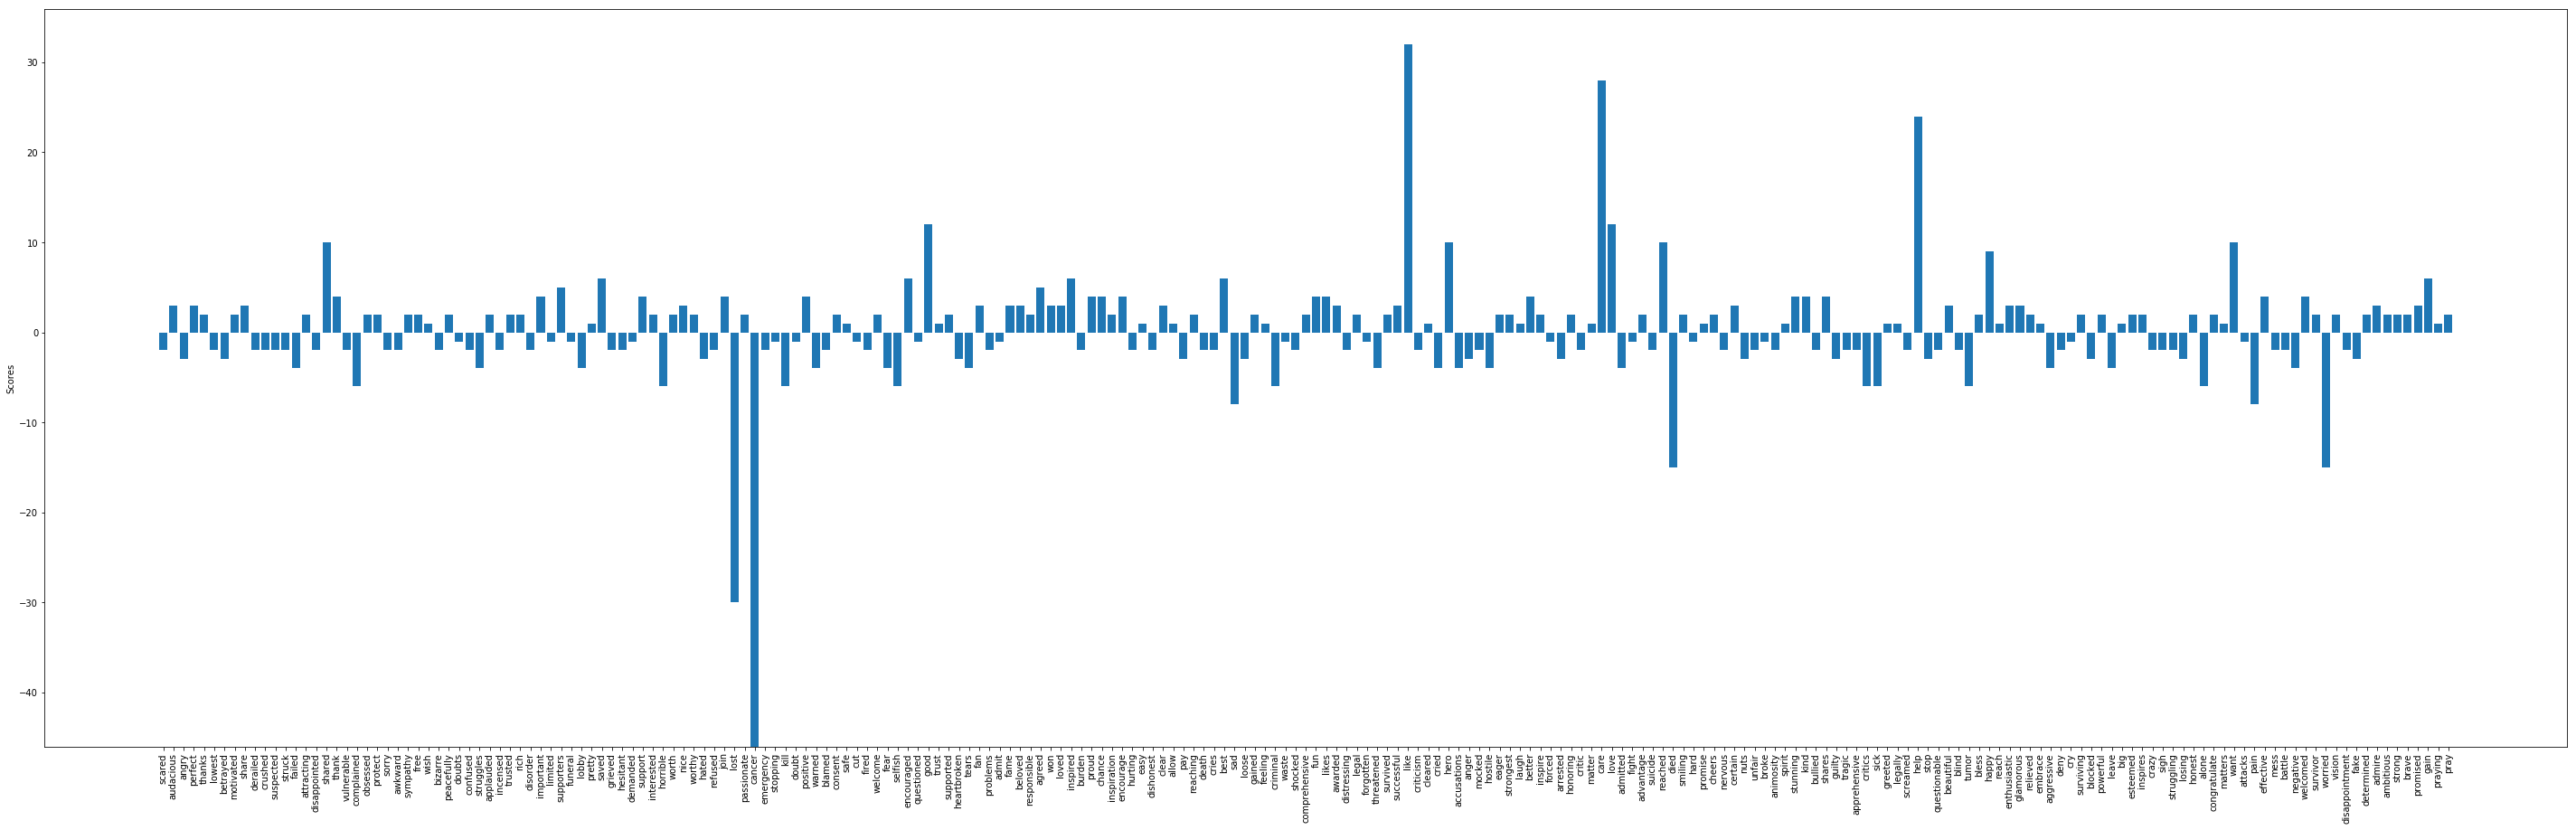

In [49]:
import matplotlib.pyplot as plt

D = wt_dict
fig, ax = plt.subplots()
plt.bar(range(len(D)), list(D.values()), align='center')

fig.set_size_inches(50, 15)
plt.xticks(range(len(D)), list(D.keys()),rotation='vertical')
plt.ylabel('Scores')
plt.savefig('cancer_story.png')
plt.show()

## STEP1: Conclusion

### The Article Published on Dec 3rd on CNN webpage has projected it's content in a positive way!

#### Note: For more detailed work on comparison of news media websites based on the content of their articles can be found on [Github](https://github.com/harishaaram/NewsOptimism)